## Working with Hypothyroid
Thyroid disease records supplied by the Garavan Institute and J.Ross

Quinlan, New South Wales Institute, Syndney, Australia.1987.

In [19]:
import pandas as pd
# Reformating the columns
column_names = [
    'age','sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication','sick','pregnant','thyroid_surgery','I131_treatment',
    'query_hypothyroid','query_hyperthyroid','lithium','goitre','tumor','hypopituitary','psych','TSH_measured','TSH','T3_measured','T3',
    'TT4_measured','TT4','T4U_measured','T4','FTI_measured','FTI','TBG_measured','TBG','referral_source','classes|'
]


In [20]:
#Load the Diseases.data file into a DataFrame
data_file_path = 'allhypo.data'
df = pd.read_csv(data_file_path, header=None, names=column_names, na_values='?')

In [21]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4,FTI_measured,FTI,TBG_measured,TBG,referral_source,classes|
0,41.0,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,negative.|3733
1,23.0,F,f,f,f,f,f,f,f,f,...,t,102.0,f,NaN,f,NaN,f,NaN,other,negative.|1442
2,46.0,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,NaN,other,negative.|2965
3,70.0,F,t,f,f,f,f,f,f,f,...,t,175.0,f,NaN,f,NaN,f,NaN,other,negative.|806
4,70.0,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,NaN,SVI,negative.|2807


## EDA/Feature Engineering

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from imblearn.over_sampling import SMOTENC,SMOTE,KMeansSMOTE
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
sns.set()
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score,confusion_matrix, roc_curve, auc

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        2799 non-null   float64
 1   sex                        2690 non-null   object 
 2   on_thyroxine               2800 non-null   object 
 3   query_on_thyroxine         2800 non-null   object 
 4   on_antithyroid_medication  2800 non-null   object 
 5   sick                       2800 non-null   object 
 6   pregnant                   2800 non-null   object 
 7   thyroid_surgery            2800 non-null   object 
 8   I131_treatment             2800 non-null   object 
 9   query_hypothyroid          2800 non-null   object 
 10  query_hyperthyroid         2800 non-null   object 
 11  lithium                    2800 non-null   object 
 12  goitre                     2800 non-null   object 
 13  tumor                      2800 non-null   objec

In [24]:
df.describe()

,age,TSH,T3,TT4,T4,FTI,TBG
count,2799.00000,2516.000000,2215.000000,2616.000000,2503.000000,2505.000000,0.0
mean,51.84423,4.672150,2.024966,109.072401,0.997912,110.787984,NaN
std,20.46116,21.449453,0.824600,35.392443,0.194390,32.883986,NaN
min,1.00000,0.005000,0.050000,2.000000,0.310000,2.000000,NaN
25%,36.00000,0.440000,1.600000,88.000000,0.880000,93.000000,NaN
50%,54.00000,1.400000,2.000000,104.000000,0.980000,107.000000,NaN
75%,67.00000,2.600000,2.400000,125.000000,1.080000,124.000000,NaN
max,455.00000,478.000000,10.600000,430.000000,2.120000,395.000000,NaN


In [25]:
df.isna().sum()

age                             1
sex                           110
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH_measured                    0
TSH                           284
T3_measured                     0
T3                            585
TT4_measured                    0
TT4                           184
T4U_measured                    0
T4                            297
FTI_measured                    0
FTI                           295
TBG_measured                    0
TBG                          2800
referral_source                 0
classes|      

In [26]:
df.shape

(2800, 30)

In [27]:
# As there are 2800 rows and TBG as 2800 NAN value so droping both TBG and TBG_measured column
df = df.drop(columns=['TBG_measured','TBG'],axis = 1)

In [29]:
#mapping the categorical values like below:
df['sex'] = df['sex'].map({'F' : 0, 'M' : 1})

# except for 'Sex' column all the other columns with two categorical data have same value 'f' and 't'.
# so instead of mapping indvidually, usign a loop to do the mapping
for column in df.columns:
    if  len(df[column].unique())==2:
        df[column] = df[column].map({'f' : 0, 't' : 1})
        
# this will map all the rest of the columns. Now there are handful of column left with more than 2 categories. 

In [30]:
df['referral_source'].unique() #referel_source has 5 categories usign get dummies on it 

array(['SVHC', 'other', 'SVI', 'STMW', 'SVHD'], dtype=object)

In [31]:
df = pd.get_dummies(df, columns=['referral_source'])

In [32]:
columns_to_transform = [ 'on_thyroxine', 'query_on_thyroxine','on_antithyroid_medication','sick','pregnant','thyroid_surgery',
                        'I131_treatment','query_hypothyroid','query_hyperthyroid','lithium','goitre','tumor','hypopituitary','psych',
                        'TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured',]

# Replace 't' with 1 and 'f' with 0 in the specified columns
df[columns_to_transform] = df[columns_to_transform].replace({'t': 1, 'f': 0})

In [33]:
from sklearn.preprocessing import LabelEncoder

df['class_label'] = df['classes|'].str.split('|').str[0]

# Initialize Label Encoder
label_encoder = LabelEncoder()

# Fit and transform the extracted class labels
df['classes_encoded'] = label_encoder.fit_transform(df['class_label'])


In [34]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,FTI_measured,FTI,classes|,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other,class_label,classes_encoded
0,41.0,0.0,0,0,0,0,0,0,0,0,...,1,109.0,negative.|3733,False,True,False,False,False,negative.,1
1,23.0,0.0,0,0,0,0,0,0,0,0,...,0,NaN,negative.|1442,False,False,False,False,True,negative.,1
2,46.0,1.0,0,0,0,0,0,0,0,0,...,1,120.0,negative.|2965,False,False,False,False,True,negative.,1
3,70.0,0.0,1,0,0,0,0,0,0,0,...,0,NaN,negative.|806,False,False,False,False,True,negative.,1
4,70.0,0.0,0,0,0,0,0,0,0,0,...,1,70.0,negative.|2807,False,False,False,True,False,negative.,1


In [35]:
df.drop(columns=['classes|','class_label'],axis = 1,inplace=True)

In [36]:
df['classes_encoded'].unique()

array([1, 0, 2, 3])

In [37]:
df.describe(include='all')


,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T4U_measured,T4,FTI_measured,FTI,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other,classes_encoded
count,2799.00000,2690.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,...,2800.000000,2503.000000,2800.000000,2505.000000,2800,2800,2800,2800,2800,2800.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,False,False,False,False,True,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2709,2525,2769,2029,1632,NaN
mean,51.84423,0.319703,0.117857,0.014286,0.012143,0.039286,0.014643,0.013929,0.017143,0.058214,...,0.893929,0.997912,0.894643,110.787984,NaN,NaN,NaN,NaN,NaN,0.969286
std,20.46116,0.466448,0.322496,0.118687,0.109543,0.194309,0.120140,0.117215,0.129827,0.234190,...,0.307984,0.194390,0.307068,32.883986,NaN,NaN,NaN,NaN,NaN,0.282488
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.310000,0.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000
25%,36.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.880000,1.000000,93.000000,NaN,NaN,NaN,NaN,NaN,1.000000
50%,54.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.980000,1.000000,107.000000,NaN,NaN,NaN,NaN,NaN,1.000000
75%,67.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.080000,1.000000,124.000000,NaN,NaN,NaN,NaN,NaN,1.000000


All the encoding for Categorical values is done. Imputing the missing values using KNN Imputer.



In [38]:
imputer=KNNImputer(n_neighbors=3, weights='uniform',missing_values=np.nan)
new_array=imputer.fit_transform(df) # impute the missing values
# converting the nd-array returned in the step above to a Dataframe
new_df=pd.DataFrame(data=np.round(new_array), columns=df.columns)

In [39]:
new_df.isna().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4                           0
FTI_measured                 0
FTI                          0
referral_source_STMW         0
referral_source_SVHC         0
referral_source_SVHD         0
referral_source_SVI          0
referral_source_other        0
classes_encoded              0
dtype: i

C:\Users\Bishal Roy\AppData\Local\Temp\ipykernel_28576\3234850559.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[column])
C:\Users\Bishal Roy\AppData\Local\Temp\ipykernel_28576\3234850559.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[column])
C:\Users\Bishal Roy\AppData\

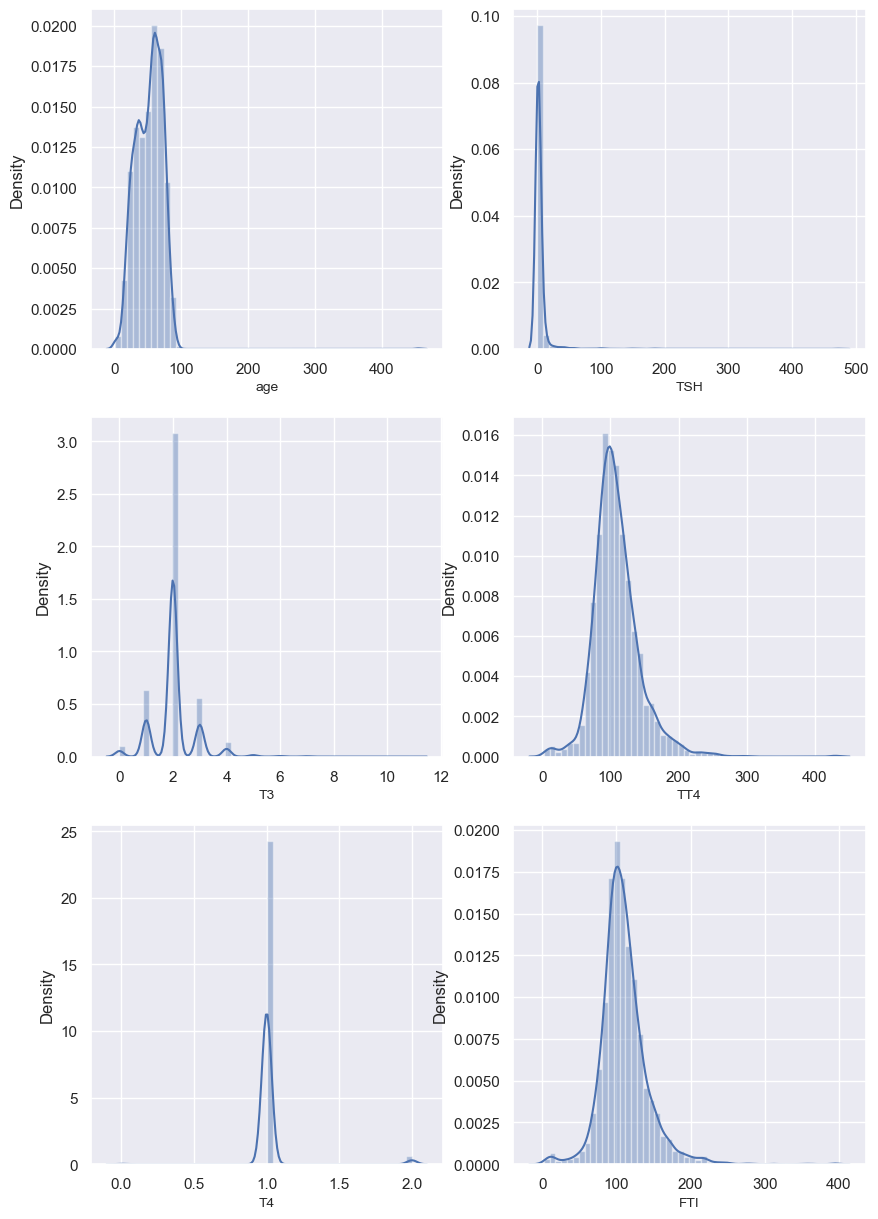

In [40]:
columns = ['age','TSH','T3','TT4','T4','FTI']

plt.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in columns:
    ax = plt.subplot(3,2,plotnumber)
    sns.distplot(new_df[column])
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()


The graphs for age, TSH and T3 looks heavely skewed towards left. Let's do some transformations to the data and see if it improves the plot.

Before doing log transformation , let's add 1 to each valuue in the column to handle exception when we try to find log of '0'

C:\Users\Bishal Roy\AppData\Local\Temp\ipykernel_28576\3777586228.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(new_df[column]))
C:\Users\Bishal Roy\AppData\Local\Temp\ipykernel_28576\3777586228.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(new_df[column]))
C:\Users\Bis

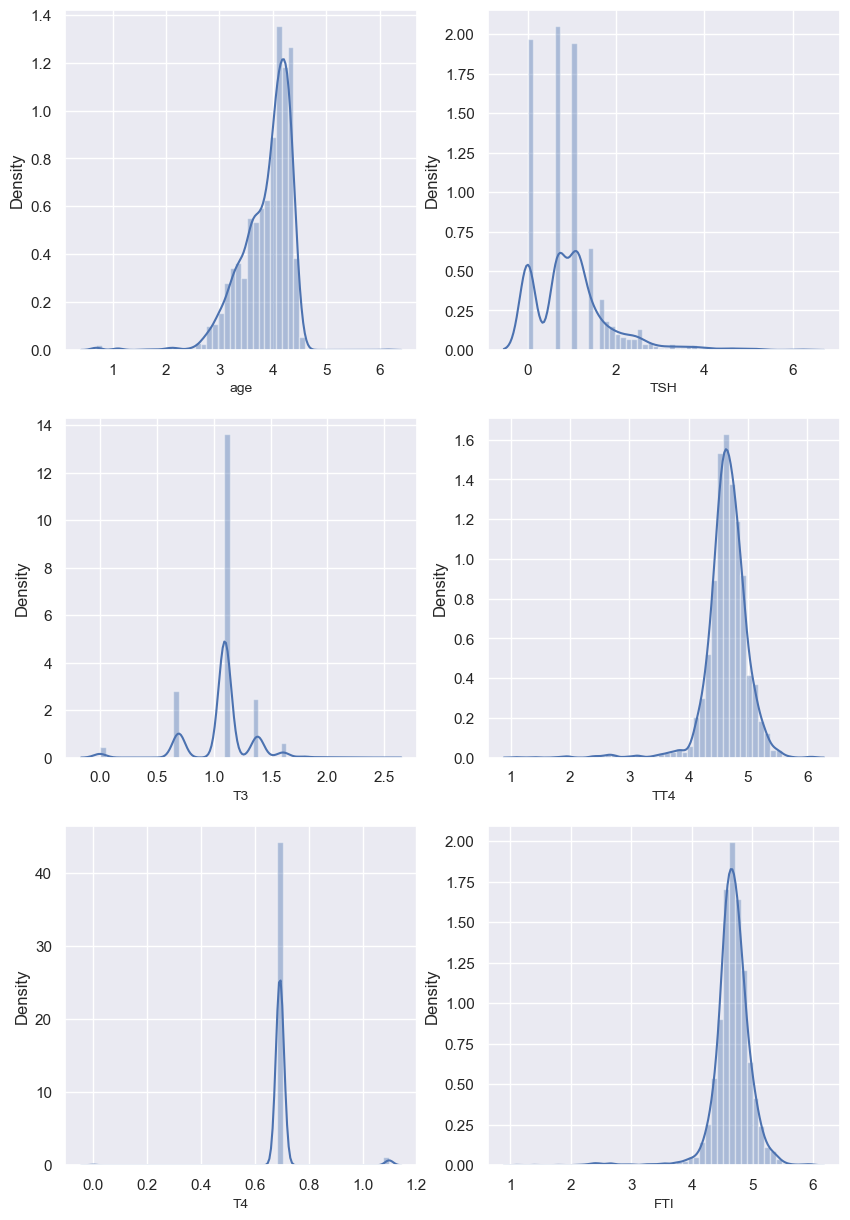

In [41]:
columns = ['age','TSH','T3','TT4','T4','FTI']

plt.figure(figsize=(10,15),facecolor='white')
plotnumber = 1

for column in columns:
    new_df[column]+=1
    ax = plt.subplot(3,2,plotnumber)
    sns.distplot(np.log(new_df[column]))
    plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

After log transformation, rest of the columns look fine but 'TSH' has a weird trend.

It won't give much of information so dropping this column.

#### Checking how balanced the dataset in terms of given target classes:

In [43]:
new_df['classes_encoded']=new_df.classes_encoded.astype(int)

In [44]:
new_df.classes_encoded.value_counts()

classes_encoded
1    2580
0     154
2      64
3       2
Name: count, dtype: int64

The dataset is highly imbalanced.

Using imbalanced-learn to deal with imbalanced data.

Imbalanced learn has an algorithm called SMOTE (Synthetic Minority Over-sampling Technique).

### Handling Imbalanced Dataset

In [47]:
X = new_df.drop(['classes_encoded'],axis=1)
y = new_df['classes_encoded']
smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=1)
x_sampled,y_sampled  = smote.fit_resample(X,y)

In [48]:
x_sampled.shape

(10320, 31)

In [51]:
x_sampled = pd.DataFrame(data = x_sampled, columns = X.columns)

In [52]:

x_sampled

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4,FTI_measured,FTI,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,42.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,126.000000,1.000000,2.0,1.000000,110.000000,0.0,1.0,0.0,0.0,0.0
1,24.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,103.000000,0.000000,2.0,0.000000,97.000000,0.0,0.0,0.0,0.0,1.0
2,47.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,110.000000,1.000000,2.0,1.000000,121.000000,0.0,0.0,0.0,0.0,1.0
3,71.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,176.000000,0.000000,2.0,0.000000,178.000000,0.0,0.0,0.0,0.0,1.0
4,71.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,62.000000,1.000000,2.0,1.000000,71.000000,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10315,43.867290,0.626542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.626542,...,32.709907,0.373458,2.0,0.373458,56.879626,0.0,0.0,0.0,0.0,1.0
10316,43.276682,0.744664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.744664,...,29.638746,0.255336,2.0,0.255336,57.233991,0.0,0.0,0.0,0.0,1.0
10317,46.470628,0.105874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.105874,...,46.247268,0.894126,2.0,0.894126,55.317623,0.0,0.0,0.0,0.0,1.0
10318,43.774488,0.645102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.645102,...,32.227340,0.354898,2.0,0.354898,56.935307,0.0,0.0,0.0,0.0,1.0


In [54]:
y_sampled.value_counts()  

classes_encoded
1    2580
0    2580
2    2580
3    2580
Name: count, dtype: int64

The dataset looks balanced now.

#### Checking for corelations in dataset

In [55]:
combined_data = pd.concat([x_sampled, y_sampled], axis=1)
combined_data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T4U_measured,T4,FTI_measured,FTI,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other,classes_encoded
0,42.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,1.000000,2.0,1.000000,110.000000,0.0,1.0,0.0,0.0,0.0,1
1,24.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,2.0,0.000000,97.000000,0.0,0.0,0.0,0.0,1.0,1
2,47.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,1.000000,2.0,1.000000,121.000000,0.0,0.0,0.0,0.0,1.0,1
3,71.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,2.0,0.000000,178.000000,0.0,0.0,0.0,0.0,1.0,1
4,71.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,1.000000,2.0,1.000000,71.000000,0.0,0.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10315,43.867290,0.626542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.626542,...,0.373458,2.0,0.373458,56.879626,0.0,0.0,0.0,0.0,1.0,3
10316,43.276682,0.744664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.744664,...,0.255336,2.0,0.255336,57.233991,0.0,0.0,0.0,0.0,1.0,3
10317,46.470628,0.105874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.105874,...,0.894126,2.0,0.894126,55.317623,0.0,0.0,0.0,0.0,1.0,3
10318,43.774488,0.645102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.645102,...,0.354898,2.0,0.354898,56.935307,0.0,0.0,0.0,0.0,1.0,3


In [56]:
combined_data.corr()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,T4U_measured,T4,FTI_measured,FTI,referral_source_STMW,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other,classes_encoded
age,1.000000,0.001859,-0.017744,-0.096751,-0.024079,0.088627,-0.058159,-0.072077,0.073861,-0.123898,...,0.245897,-0.016445,0.245711,0.047931,-0.321946,-0.059380,0.029422,0.377405,-0.209191,-0.156348
sex,0.001859,1.000000,-0.126687,-0.043890,-0.017592,0.018068,-0.052817,-0.077456,-0.086425,0.295089,...,-0.328291,-0.064672,-0.328211,-0.057972,-0.141503,0.042919,-0.010245,0.042454,-0.006490,0.190997
on_thyroxine,-0.017744,-0.126687,1.000000,-0.004587,0.009641,-0.035795,0.027208,0.017139,0.117800,-0.022508,...,0.118772,0.001685,0.118682,0.125991,0.007984,-0.043263,-0.000614,-0.116753,0.123493,-0.016149
query_on_thyroxine,-0.096751,-0.043890,-0.004587,1.000000,-0.008345,0.050529,0.027204,-0.000752,-0.016779,-0.048464,...,0.066450,0.005552,0.066419,0.058844,-0.021962,0.005139,0.089838,-0.042849,0.027405,-0.119059
on_antithyroid_medication,-0.024079,-0.017592,0.009641,-0.008345,1.000000,-0.013312,0.067400,-0.008143,0.003275,-0.039964,...,0.011084,0.057312,0.011047,0.027583,0.026081,-0.017080,-0.007910,-0.044103,0.040317,-0.052396
sick,0.088627,0.018068,-0.035795,0.050529,-0.013312,1.000000,-0.011637,-0.020767,-0.010741,0.021468,...,0.062343,-0.015524,0.062267,0.135976,-0.035034,-0.014595,0.285915,0.138307,-0.161391,-0.188754
pregnant,-0.058159,-0.052817,0.027208,0.027204,0.067400,-0.011637,1.000000,-0.007118,-0.009175,-0.034233,...,0.038163,0.341209,0.038147,0.055040,0.211556,-0.007082,-0.006914,-0.038552,-0.034837,-0.028244
thyroid_surgery,-0.072077,-0.077456,0.017139,-0.000752,-0.008143,-0.020767,-0.007118,1.000000,-0.016373,-0.018212,...,0.054594,-0.003477,0.054557,-0.010273,-0.014204,0.050815,-0.012339,-0.005182,-0.011108,0.014153
I131_treatment,0.073861,-0.086425,0.117800,-0.016779,0.003275,-0.010741,-0.009175,-0.016373,1.000000,-0.070364,...,0.082326,-0.016767,0.082285,0.017983,-0.027621,-0.034340,-0.015904,-0.070497,0.092693,-0.090592
query_hypothyroid,-0.123898,0.295089,-0.022508,-0.048464,-0.039964,0.021468,-0.034233,-0.018212,-0.070364,1.000000,...,-0.527903,-0.063468,-0.528570,-0.179925,-0.100380,-0.072348,-0.008167,-0.212933,0.264066,0.404464


<Axes: >

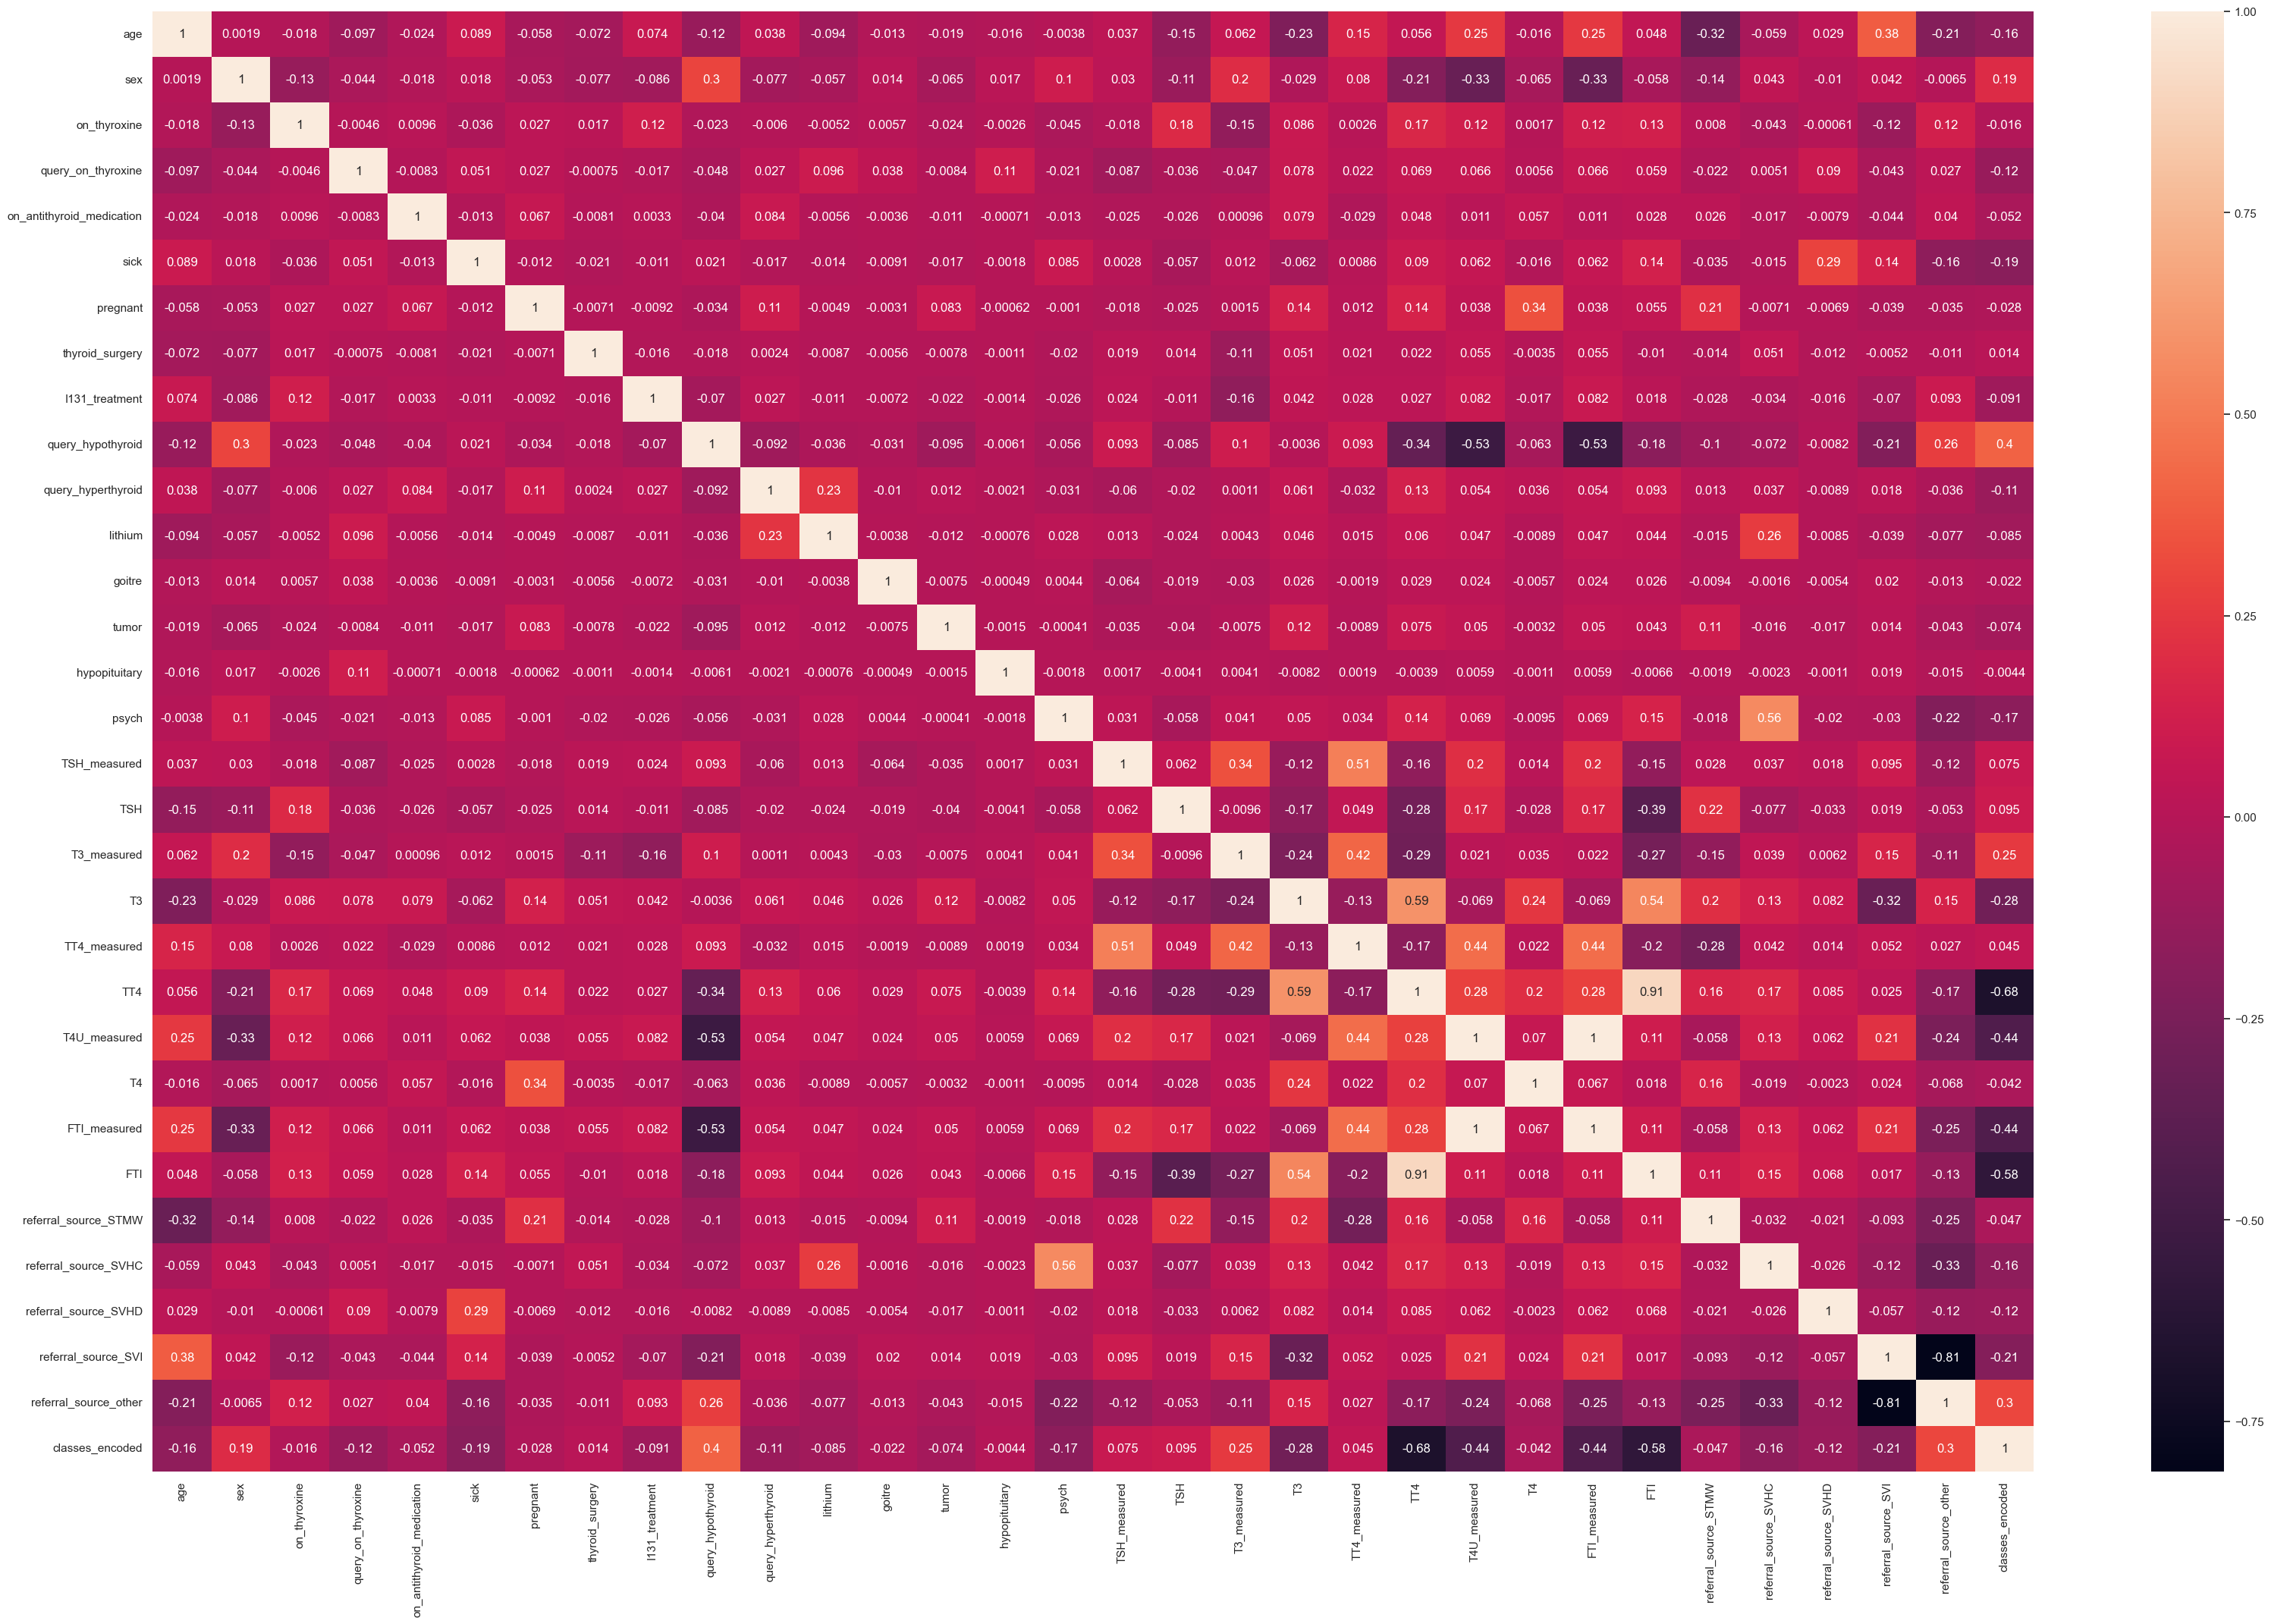

In [57]:
corrmat = combined_data.corr()
top_corr_features = corrmat.index
sns.set(rc={'figure.figsize':(40,25)})
sns.heatmap(combined_data[top_corr_features].corr(),annot = True)

The clustering of thyroid can be done considering different features. Here I'm trying to cluster different target Classes based on the sex and Recovery rate of indivisual country.

#### Checking the clusters

In [58]:
X=combined_data[["TT4","FTI"]]
#Standard Scaling since K-Means Clustering is a distance based alogrithm
std=StandardScaler()
X=std.fit_transform(X) 
X

array([[ 1.34512046,  0.90591584],
       [ 0.78058932,  0.55312079],
       [ 0.95240314,  1.20443474],
       ...,
       [-0.61239698, -0.57805895],
       [-0.95651376, -0.53415811],
       [-0.91932476, -0.53890251]])

In [59]:
#using elbow method to dtetrminne the number of clusters and validating it through silhouette score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
wcss=[]
sil=[]
for i in range(2,11):
    clf=KMeans(n_clusters=i,init='k-means++',random_state=42)
    clf.fit(X)
    labels=clf.labels_    
    centroids=clf.cluster_centers_
    sil.append(silhouette_score(X, labels, metric='euclidean'))
    wcss.append(clf.inertia_)

Text(0.5, 1.0, 'Silhouette Score Method')

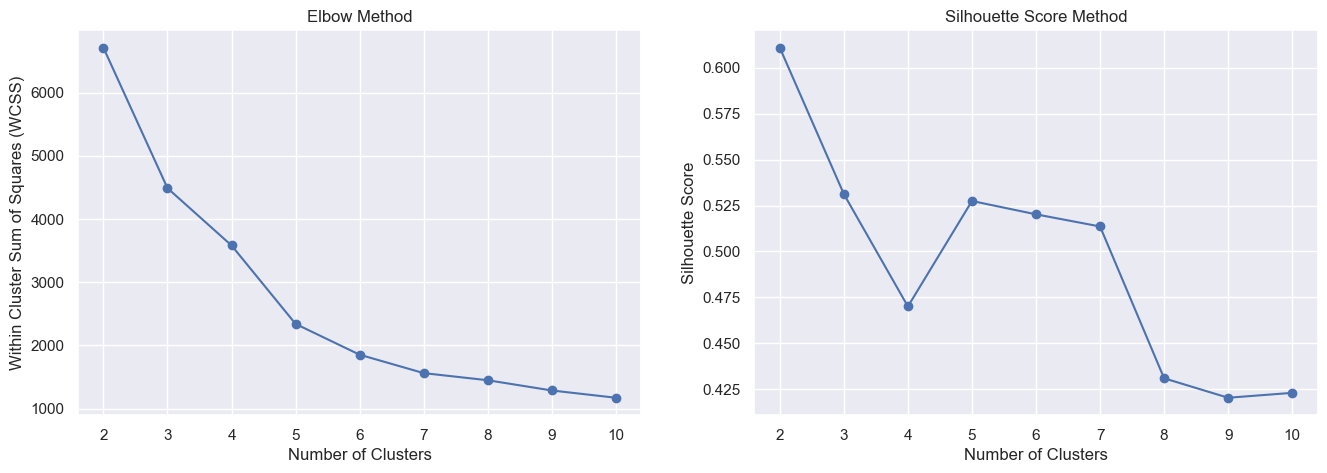

In [66]:
#silhouette_score to validate number of clusters are chosen correctly 
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,5))
x=np.arange(2,11)
ax1.plot(x,wcss,marker='o')
ax1.set_xlabel("Number of Clusters")
ax1.set_ylabel("Within Cluster Sum of Squares (WCSS)")
ax1.set_title("Elbow Method")
x=np.arange(2,11)
ax2.plot(x,sil,marker='o')
ax2.set_xlabel("Number of Clusters")
ax2.set_ylabel("Silhouette Score")
ax2.set_title("Silhouette Score Method")

In [67]:
clf_final=KMeans(n_clusters=2,init='k-means++',random_state=42)
clf_final.fit(X)

KMeans(n_clusters=2, random_state=42)

In [68]:
combined_data["Clusters"]=clf_final.predict(X)

<Axes: xlabel='TT4', ylabel='FTI'>

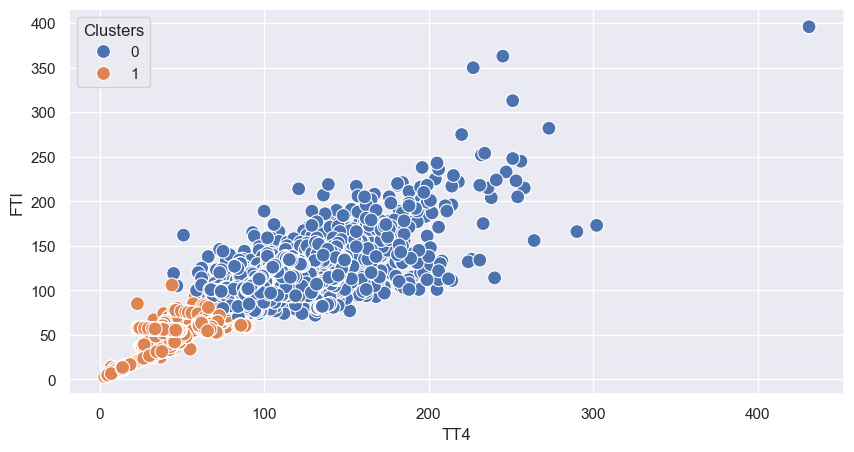

In [69]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=combined_data["TT4"],y=combined_data["FTI"],hue=combined_data["Clusters"],s=100)

In [70]:
print("Few points in dataset belonging to Cluster 0: ",list(combined_data[combined_data["Clusters"]==0].head(10).index))
print("Few points in dataset belonging to Cluster 1: ",list(combined_data[combined_data["Clusters"]==1].head(10).index))

Few points in dataset belonging to Cluster 0:  [0, 1, 2, 3, 5, 7, 8, 9, 10, 11]
Few points in dataset belonging to Cluster 1:  [4, 6, 26, 34, 40, 57, 62, 88, 89, 91]


In [71]:
def vif_score(x):
    scaler = StandardScaler() # performing scaling on data without output class 
    arr = scaler.fit_transform(x)
    return pd.DataFrame([[x.columns[i], variance_inflation_factor(arr,i)] for i in range(arr.shape[1])], columns=["FEATURE", "VIF_SCORE"])


In [72]:
vif_score(x_sampled)

d:\Anaconda\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,FEATURE,VIF_SCORE
0,age,1.458308
1,sex,1.368845
2,on_thyroxine,1.176923
3,query_on_thyroxine,1.075284
4,on_antithyroid_medication,1.024256
5,sick,1.189062
6,pregnant,1.211955
7,thyroid_surgery,1.049912
8,I131_treatment,1.081622
9,query_hypothyroid,1.882251


We can see that the data has multicollinearity the features which are depicting that are referral_source_STMW, referral_source_SVHC, referral_source_SVHD referral_source_SVI, referral_source_other, TT4 and FTI so dropping the first four referral_source_STMW, referral_source_SVHC, referral_source_SVHD referral_source_SVI, TT4 and FTI for preventing multicollinearity

NOTE: here FTI and TT4 are the feature we performed clustering on but due to high VIF value i am dropping those (the dataset is small) and from the corelation matiex asfter drooping the feature TT$ anf FTI we can see that there ain't any features with positive corelation so here we can take advice from doctors to ask which are the prominent featrures as ooer them to perform our clustering in making the model better or we can incllude those two features without dropping with high VIF and then compute the results or drop them and compite the results (a discussion between client and supervisor is first required in these scenarios)

Here i have finally decided to dropped the columns to prevent multicollinearity.

In [73]:
x_sampled.drop('referral_source_STMW', axis=1, inplace = True)

In [74]:
x_sampled.drop('referral_source_SVHC', axis=1, inplace = True)

In [75]:
x_sampled.drop('referral_source_SVHD', axis=1, inplace = True)

In [76]:
x_sampled.drop('referral_source_SVI', axis=1, inplace = True)

In [77]:
x_sampled.drop('TT4', axis=1, inplace = True)

In [78]:

x_sampled.drop('FTI', axis=1, inplace = True)

In [79]:
x_sampled

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,T4U_measured,T4,FTI_measured,referral_source_other
0,42.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,1.0,2.000000,1.0,3.000000,1.0,1.000000,2.0,1.000000,0.0
1,24.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,1.0,5.000000,1.0,3.000000,1.0,0.000000,2.0,0.000000,1.0
2,47.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,1.0,2.000000,0.0,3.000000,1.0,1.000000,2.0,1.000000,1.0
3,71.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,1.0,1.000000,1.0,3.000000,1.0,0.000000,2.0,0.000000,1.0
4,71.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,1.0,2.000000,1.0,2.000000,1.0,1.000000,2.0,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10315,43.867290,0.626542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.626542,...,0.0,1.0,2.867290,1.0,2.626542,1.0,0.373458,2.0,0.373458,1.0
10316,43.276682,0.744664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.744664,...,0.0,1.0,2.276682,1.0,2.744664,1.0,0.255336,2.0,0.255336,1.0
10317,46.470628,0.105874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.105874,...,0.0,1.0,5.470628,1.0,2.105874,1.0,0.894126,2.0,0.894126,1.0
10318,43.774488,0.645102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.645102,...,0.0,1.0,2.774488,1.0,2.645102,1.0,0.354898,2.0,0.354898,1.0


In [80]:
# checking VIF score agian 
vif_score(x_sampled)

,FEATURE,VIF_SCORE
0,age,1.286994
1,sex,1.296720
2,on_thyroxine,1.116857
3,query_on_thyroxine,1.067655
4,on_antithyroid_medication,1.022943
5,sick,1.056466
6,pregnant,1.166644
7,thyroid_surgery,1.035690
8,I131_treatment,1.072956
9,query_hypothyroid,1.786868


<Axes: >

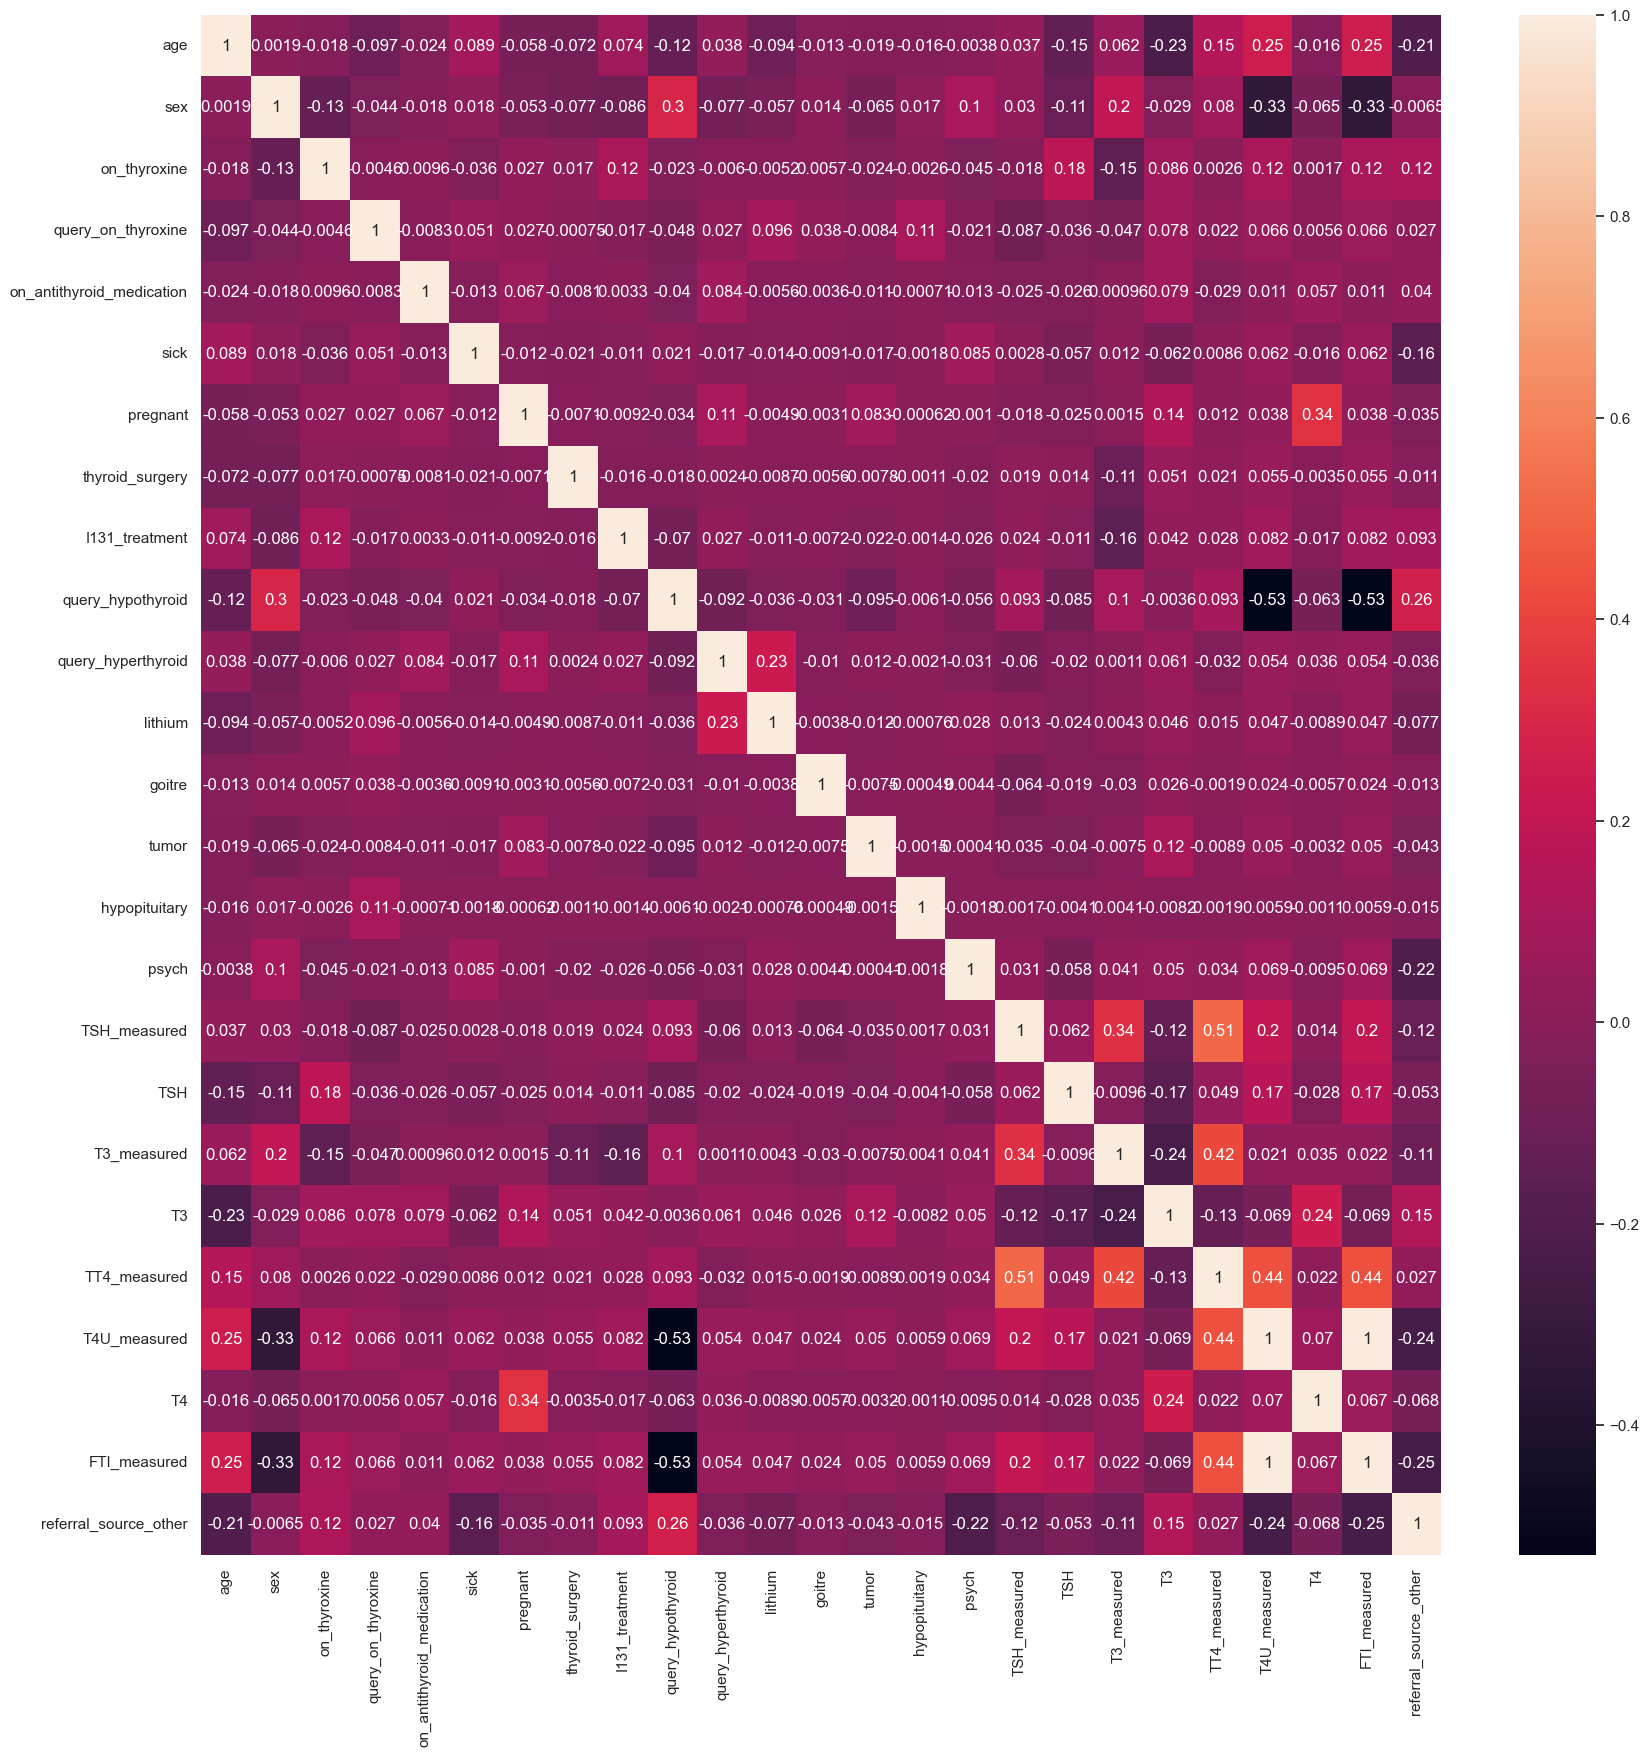

In [81]:
#same corealations can be seend on sampled data with out the target class 
#get correlations of each features in dataset
corrmat = x_sampled.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
sns.heatmap(x_sampled[top_corr_features].corr(),annot=True)

In [82]:
#scaling down the sampled data before it was done in function only to check the vif score 
scalar = StandardScaler()
X_scaled = scalar.fit_transform(x_sampled)
X_scaled

array([[-0.4826455 , -0.83629799, -0.26212262, ..., -0.11542336,
         0.60400681, -1.57194669],
       [-1.53953717, -0.83629799, -0.26212262, ..., -0.11542336,
        -2.48169115,  0.75217436],
       [-0.18906448,  1.72026701, -0.26212262, ..., -0.11542336,
         0.60400681,  0.75217436],
       ...,
       [-0.22014717, -0.56562341, -0.26212262, ..., -0.11542336,
         0.27731064,  0.75217436],
       [-0.37845428,  0.81294801, -0.26212262, ..., -0.11542336,
        -1.38658409,  0.75217436],
       [-0.36134589,  0.66396461, -0.26212262, ..., -0.11542336,
        -1.20676556,  0.75217436]])

In [83]:
y_sampled.unique()

array([1, 0, 2, 3])

## Splitting the dataset into training and testing 


In [84]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled , y_sampled , test_size = .30 , random_state = 144) #using 30% of data as test set)

In [85]:
X_train

array([[-0.89365893, -0.83629799, -0.26212262, ..., -0.11542336,
         0.60400681,  0.75217436],
       [-0.22590488, -0.51548412, -0.26212262, ..., -0.11542336,
         0.216794  ,  0.75217436],
       [-0.43177007,  1.27723311, -0.26212262, ..., -0.11542336,
        -1.94696241,  0.75217436],
       ...,
       [ 0.69442542,  1.72026701, -0.26212262, ..., -0.11542336,
         0.60400681, -1.57194669],
       [ 1.33755681, -0.83629799, -0.26212262, ..., -0.11542336,
         0.60400681,  0.75217436],
       [-0.46428897,  1.56041447, -0.26212262, ..., -0.11542336,
        -2.28875389,  0.75217436]])

In [86]:
X_test

array([[ 1.27884061, -0.83629799, -0.26212262, ..., -0.11542336,
         0.60400681, -1.57194669],
       [-0.30649689,  1.72026701, -0.26212262, ..., -0.11542336,
         0.60400681, -0.78410278],
       [ 0.0891396 , -0.83629799, -0.26212262, ..., -0.11542336,
         0.60400681, -1.57194669],
       ...,
       [ 1.04397579, -0.83629799, -0.26212262, ..., -0.11542336,
         0.60400681, -1.57194669],
       [-0.24767602, -0.32589643, -0.26212262, ..., -0.11542336,
        -0.0120327 ,  0.75217436],
       [-0.97623316, -0.83629799,  0.18176552, ..., -0.11542336,
         0.60400681,  0.75217436]])

In [87]:
y_test

1889    1
6899    2
6178    2
7443    2
2820    0
       ..
1672    1
1142    1
2719    2
8060    3
5970    2
Name: classes_encoded, Length: 3096, dtype: int32

In [88]:
y_train

1885     1
10134    3
8884     3
6687     2
3194     0
        ..
1446     1
7384     2
6010     2
1468     1
9575     3
Name: classes_encoded, Length: 7224, dtype: int32

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve 
import warnings
warnings.filterwarnings("ignore")

Logisitic Regression
Model performance for Training set
- Accuracy: 0.9412
- F1 score: 0.9411
- Precision: 0.9417
- Recall: 0.9412
----------------------------------
Model performance for Test set
- Accuracy: 0.9409
- F1 score: 0.9408
- Precision: 0.9415
- Recall: 0.9409


[[703   2  57  17]
 [  8 741  10  28]
 [ 56   3 687   2]
 [  0   0   0 782]]


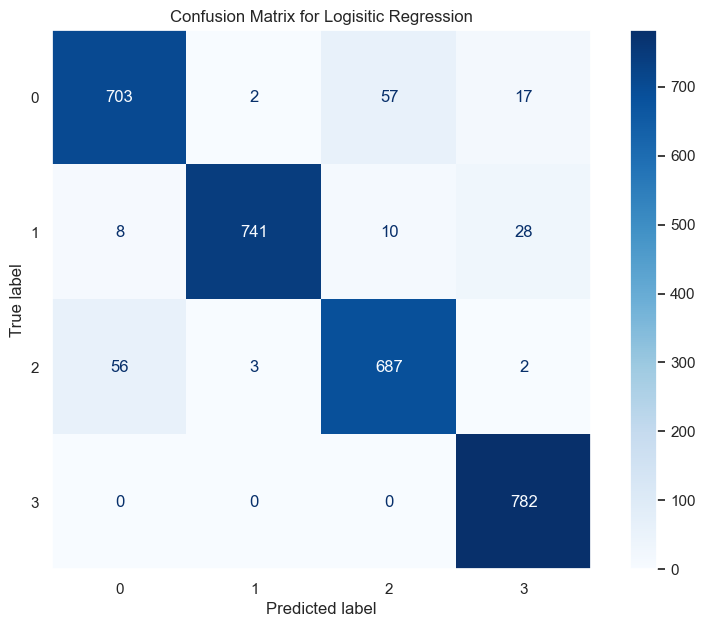

Decision Tree
Model performance for Training set
- Accuracy: 0.9999
- F1 score: 0.9999
- Precision: 0.9999
- Recall: 0.9999
----------------------------------
Model performance for Test set
- Accuracy: 0.9897
- F1 score: 0.9897
- Precision: 0.9897
- Recall: 0.9897


[[767   4   8   0]
 [  6 779   1   1]
 [  9   3 736   0]
 [  0   0   0 782]]


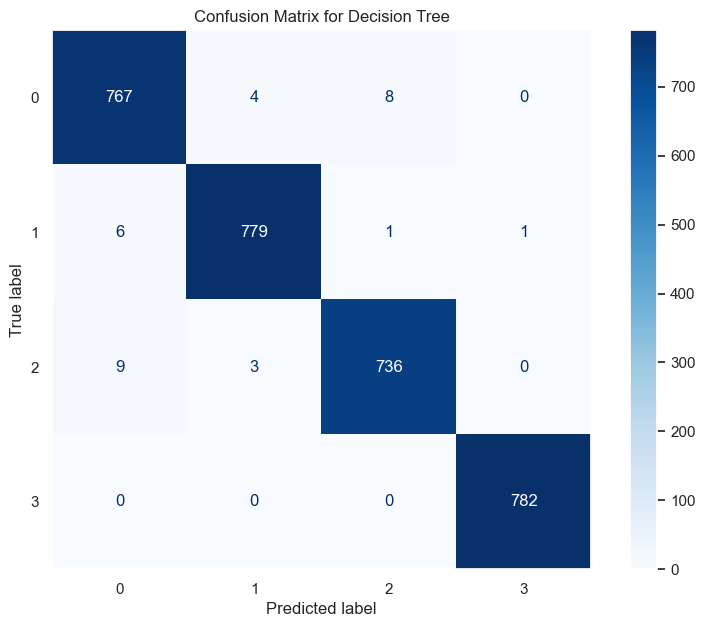

Random Forest
Model performance for Training set
- Accuracy: 0.9999
- F1 score: 0.9999
- Precision: 0.9999
- Recall: 0.9999
----------------------------------
Model performance for Test set
- Accuracy: 0.9955
- F1 score: 0.9955
- Precision: 0.9955
- Recall: 0.9955


[[776   3   0   0]
 [  4 782   1   0]
 [  4   2 742   0]
 [  0   0   0 782]]


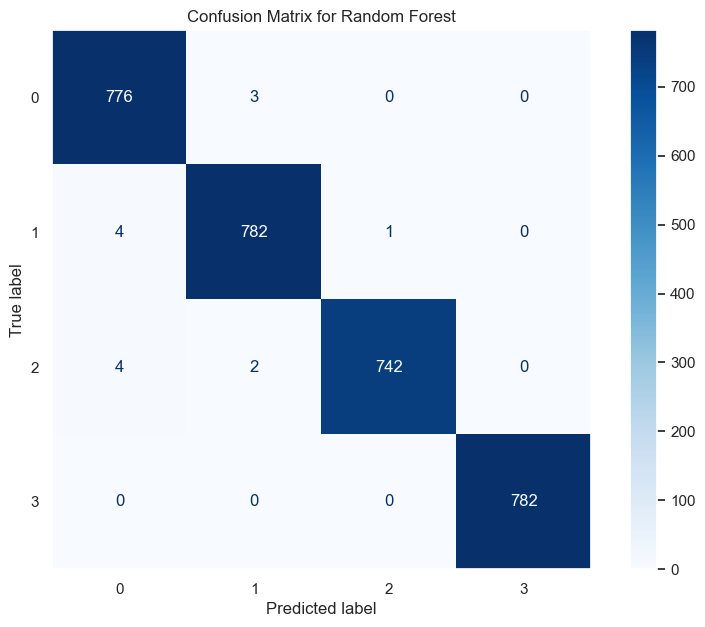

Gradient Boost
Model performance for Training set
- Accuracy: 0.9938
- F1 score: 0.9938
- Precision: 0.9938
- Recall: 0.9938
----------------------------------
Model performance for Test set
- Accuracy: 0.9922
- F1 score: 0.9922
- Precision: 0.9923
- Recall: 0.9922


[[774   4   1   0]
 [  2 785   0   0]
 [ 14   3 731   0]
 [  0   0   0 782]]


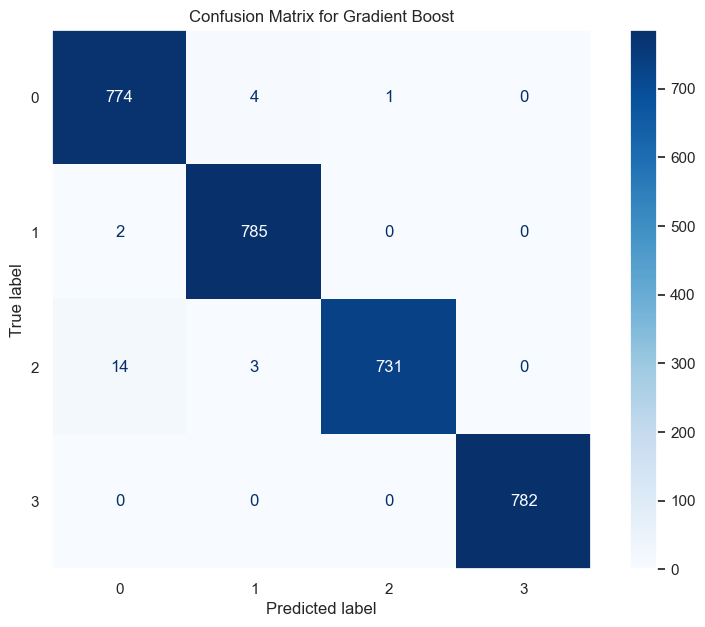

SVC
Model performance for Training set
- Accuracy: 0.9482
- F1 score: 0.9481
- Precision: 0.9487
- Recall: 0.9482
----------------------------------
Model performance for Test set
- Accuracy: 0.9435
- F1 score: 0.9432
- Precision: 0.9440
- Recall: 0.9435


[[669  89  17   4]
 [ 26 753   5   3]
 [ 29   2 717   0]
 [  0   0   0 782]]


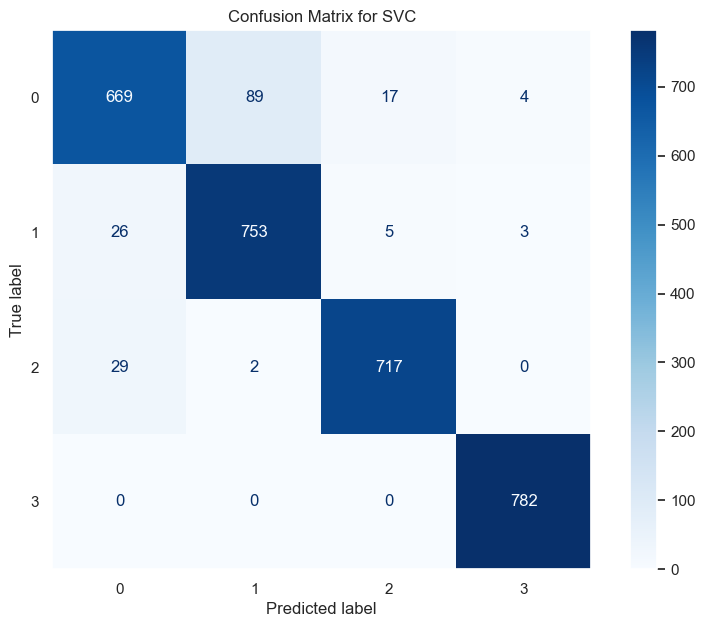

K-neighbors classifier
Model performance for Training set
- Accuracy: 0.9755
- F1 score: 0.9754
- Precision: 0.9754
- Recall: 0.9755
----------------------------------
Model performance for Test set
- Accuracy: 0.9580
- F1 score: 0.9578
- Precision: 0.9577
- Recall: 0.9580


[[720  44  12   3]
 [ 51 719  16   1]
 [  3   0 745   0]
 [  0   0   0 782]]


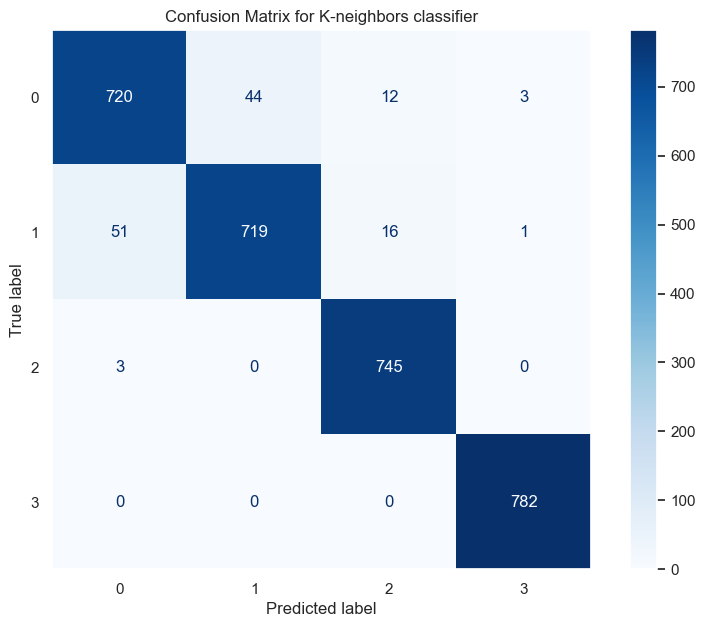

In [97]:
models={
    "Logisitic Regression":LogisticRegression(class_weight='balanced'),
    "Decision Tree":DecisionTreeClassifier(class_weight='balanced'),
    "Random Forest":RandomForestClassifier(class_weight='balanced'),
    "Gradient Boost":GradientBoostingClassifier(),
    "SVC":SVC(class_weight='balanced'),
    "K-neighbors classifier":KNeighborsClassifier()
}
 
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred, average='weighted') # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred, average='weighted') # Calculate Recall


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred, average='weighted') # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred, average='weighted') # Calculate Recall


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))

    
    print('='*35)
    print('\n')

    print(confusion_matrix(y_test,y_test_pred))


    fig, ax = plt.subplots(figsize=(10, 7))  # Resize figure here
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_test_pred))
    disp.plot(cmap=plt.cm.Blues, ax=ax)
    plt.title(f'Confusion Matrix for {list(models.keys())[i]}')
    plt.grid(False)
    plt.show()

My all model is already give very good accuracy so no need to do any parameter tunning 


In [99]:
import pickle

filename = "HypoThyroid Models.pkl"
with open(filename,'wb') as file:
    pickle.dump(model,file)

## RESULT

The best result was found in case of Random Forest classifier and give the accuracy of 99.95 and I the model is also not overfit as its has been also checked on new data 
